# **Section 1. Introduction**



This project aims to analyze suicidal instances across the world from 1980s to 2010s, according to a dataset containing features like HDI of certain countries, generations, genders, etc,. We utilize the features and data from the dataset and by mapping and analyzing the data on suicides across the world, we aim to build a machine learning model that shows the tencity and possible causations.

##1.1   Importing and introduction to the dataset

We found the dataset on kaggle.com
https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016
It shows suicidal data from 1985-2016 on 101 countries across 5 continents with 12 features.

In [0]:
import pandas as pd

In [0]:
#downloading data from github link
url = 'https://github.com/kayaki13/suicide_analysis/blob/master/master.csv?raw=true'
master_df= pd.read_csv(url)

In [3]:
#showing an overview of the dataset
master_df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


##1.2 Splitting the Dataset into Groups

For more detailed and comprehensible data analysis, in this step we are going to categorize the countries with the continents they belong to. We are selecting one continent as an example in the EDA part, and then we are going to do the same preprocessing on all sub-datasets for future reproductivity.

In [4]:
#showing how many countries are in total in our dataset
len(master_df['country'].unique())

101

In [5]:
#Categorizing the countries into certain continents
Asia = ['Albania','Afghanistan', 'Armenia','Bahrain', 'United Arab Emirates','Saudi Arabia', 'Kuwait', 'Qatar', 'Oman',
    'Sultanate of Oman','Lebanon', 'Iraq', 'Yemen', 'Pakistan', 'Lebanon', 'Philippines', 'Jordan','Israel','Japan',
       'Kazakhstan','Kyrgyzstan','Macau', 'Maldives','Mongolia','Philippines','Republic of Korea', 'Singapore',
        'Sri Lanka','Thailand','Turkmenistan','Uzbekistan']
Europe = ['Austria','Azerbaijan','Belarus','Belgium', 'Bosnia and Herzegovina','Bulgaria','Croatia','Cyprus','Czech Republic', 'Denmark','Estonia','Finland', 'France', 'Georgia',
       'Germany', 'Greece','Hungary','Iceland', 'Ireland','Italy','Latvia',
       'Lithuania', 'Luxembourg', 'Malta', 'Montenegro', 'Netherlands','Norway','Poland', 'Portugal', 'Romania', 'Russian Federation','San Marino', 'Serbia',
       'Slovakia', 'Slovenia', 'Spain','Sweden', 'Switzerland','Turkey', 'Ukraine','United Kingdom']
Africa = ['Cabo Verde','Mauritius', 'Seychelles','South Africa']
North_America= ['Antigua and Barbuda','USA','Bahamas', 'Barbados','Belize','Canada','Costa Rica',
                'Cuba','Dominica','El Salvador','Grenada','Guatemala','Jamaica','Mexico','Nicaragua','Panama','Puerto Rico','Saint Kitts and Nevis',
                'Saint Lucia','Saint Vincent and Grenadines']
South_America=['Argentina','Aruba','Brazil','Chile','Colombia','Ecuador','Guyana','Paraguay',
               'Suriname','Trinidad and Tobago','Uruguay']
Oceania=['Australia','Fiji','Kiribati','New Zealand']

def GetConti(country):
    if country in Asia:
        return "Asia"
    elif country in Europe:
        return "Europe"
    elif country in Africa:
        return "Africa"
    elif country in North_America:
        return "North America"
    elif country in South_America:
        return "South America"
    elif country in Oceania:
        return "Oceania"
    else:
      return "Other"

master_df['continent'] = master_df['country'].apply(lambda x: GetConti(x))
print(master_df)

          country  year     sex  ... gdp_per_capita ($)       generation  continent
0         Albania  1987    male  ...                796     Generation X       Asia
1         Albania  1987    male  ...                796           Silent       Asia
2         Albania  1987  female  ...                796     Generation X       Asia
3         Albania  1987    male  ...                796  G.I. Generation       Asia
4         Albania  1987    male  ...                796          Boomers       Asia
...           ...   ...     ...  ...                ...              ...        ...
27815  Uzbekistan  2014  female  ...               2309     Generation X       Asia
27816  Uzbekistan  2014  female  ...               2309           Silent       Asia
27817  Uzbekistan  2014    male  ...               2309     Generation Z       Asia
27818  Uzbekistan  2014  female  ...               2309     Generation Z       Asia
27819  Uzbekistan  2014  female  ...               2309          Boomers    

##1.3 Seperating & re-indexing the sub-datasets

Now we seperate the continent-belonged data and name them accordingly.

In [0]:
#renaming each sub-dataset
Asia_master_df=master_df[master_df.continent=='Asia']
Europe_master_df=master_df[master_df.continent=='Europe']
Africa_master_df=master_df[master_df.continent=='Africa']
Oceania_master_df=master_df[master_df.continent=='Oceania']
North_America_master_df=master_df[master_df.continent=='North America']
South_America_master_df=master_df[master_df.continent=='South America']
Other_master_df=master_df[master_df.continent=='other']

In [0]:
#showing asia df
#data cleaning:drop original index and re-index
Asia_master_df=Asia_master_df.reset_index(drop=True)

In [8]:
#See how it looks
Asia_master_df.head(50)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,continent
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,Asia
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,Asia
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,Asia
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,Asia
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,Asia
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,Asia
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent,Asia
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers,Asia
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,Asia
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X,Asia


In [0]:
#do the re-indexing for every df
Europe_master_df=Europe_master_df.reset_index(drop=True)
Africa_master_df=Africa_master_df.reset_index(drop=True)
North_America_master_df=North_America_master_df.reset_index(drop=True)
South_America_master_df=South_America_master_df.reset_index(drop=True)
Oceania_master_df=Oceania_master_df.reset_index(drop=True)
Other_master_df=Other_master_df.reset_index(drop=True)


Now let's move on to the EDA part and start data wrangling & figure plotting.

# **Section 2. EDA(Explantory Data Analysis)**






##2.1 Data cleaning

**Drop columns that are not useful**


-Since we already have suicides/100k pop, we're going to drop suicide instance numbers and overall population.

-Since we already have country and year as seperate columns, we're going to drop country-year.

-Since gdp for the year doesn't make much sense as gdp per capita, so we are going to drop 'gdp for year' as well.

In [10]:
#See which columns we have right now.
Asia_master_df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation', 'continent'],
      dtype='object')

In [0]:
#Drop columns
Asia_master_df=Asia_master_df.drop(columns=['suicides_no','population','country-year',' gdp_for_year ($) '])

In [12]:
#Now let's see now it looks now
Asia_master_df

,country,year,sex,age,suicides/100k pop,HDI for year,gdp_per_capita ($),generation,continent
0,Albania,1987,male,15-24 years,6.71,NaN,796,Generation X,Asia
1,Albania,1987,male,35-54 years,5.19,NaN,796,Silent,Asia
2,Albania,1987,female,15-24 years,4.83,NaN,796,Generation X,Asia
3,Albania,1987,male,75+ years,4.59,NaN,796,G.I. Generation,Asia
4,Albania,1987,male,25-34 years,3.28,NaN,796,Boomers,Asia
...,...,...,...,...,...,...,...,...,...
4907,Uzbekistan,2014,female,35-54 years,2.96,0.675,2309,Generation X,Asia
4908,Uzbekistan,2014,female,75+ years,2.58,0.675,2309,Silent,Asia
4909,Uzbekistan,2014,male,5-14 years,2.17,0.675,2309,Generation Z,Asia
4910,Uzbekistan,2014,female,5-14 years,1.67,0.675,2309,Generation Z,Asia


There are some NaN's in the HDI column, NaN's may affect future data analysis if we choose it as a label or future in machine learning process. Let's see how it looks if we drop all these columns with NaN. First we get the row numbers before dropping them, and then compare it with the new df after dropna(), and see whether dropping it makes a lot of difference.

In [13]:
len(Asia_master_df)

4912

In [14]:
len(Asia_master_df.dropna())

1416

It does makes a lot of difference... So let's just move on without dropping them and maybe use other features in the ml stage.

## 2.2 One hot key encoding for categorical columns

In [0]:
#for ml purposes, get dummies for sex,age, generation
Asia_age_dummies=pd.get_dummies(Asia_master_df['age'])
Asia_generation_dummies=pd.get_dummies(Asia_master_df['generation'])
Asia_sex_dummies=pd.get_dummies(Asia_master_df['sex'])
Asia_country_dummies=pd.get_dummies(Asia_master_df['country'])

In [0]:
#substituting all categorical features with dummies
Asia_non_cat=Asia_master_df.drop(columns=['sex','age','generation','continent','country'])

In [0]:
Asia_dummies= pd.concat([Asia_non_cat, Asia_age_dummies,Asia_sex_dummies,Asia_generation_dummies,Asia_country_dummies], axis=1)

Let's see how it looks.

In [18]:
Asia_dummies

,year,suicides/100k pop,HDI for year,gdp_per_capita ($),15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years,female,male,Boomers,G.I. Generation,Generation X,Generation Z,Millenials,Silent,Albania,Armenia,Bahrain,Israel,Japan,Kazakhstan,Kuwait,Kyrgyzstan,Macau,Maldives,Mongolia,Oman,Philippines,Qatar,Republic of Korea,Singapore,Sri Lanka,Thailand,Turkmenistan,United Arab Emirates,Uzbekistan
0,1987,6.71,NaN,796,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1987,5.19,NaN,796,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1987,4.83,NaN,796,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1987,4.59,NaN,796,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1987,3.28,NaN,796,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4907,2014,2.96,0.675,2309,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4908,2014,2.58,0.675,2309,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4909,2014,2.17,0.675,2309,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4910,2014,1.67,0.675,2309,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


##2.3 Do the same with Other continents

Here we define a function on how we processed the data on Asian countries, and we apply them to all the rest of the original dataset.

In [0]:
def get_dummies(x):
  #The following line gets commented out after first use because the new dataframe substitutes the original df and doesn't have the columns I'm dropping here.
  #x=x.drop(columns=['suicides_no','population','country-year',' gdp_for_year ($) '])
  x_non_cat=x.drop(columns=['sex','age','generation','continent','country'])
  x_age_dummies=pd.get_dummies(x['age'])
  x_generation_dummies=pd.get_dummies(x['generation'])
  x_sex_dummies=pd.get_dummies(x['sex'])
  x_country_dummies=pd.get_dummies(x['country'])
  x_dummies= pd.concat([x_non_cat, x_age_dummies,x_sex_dummies,x_generation_dummies,x_country_dummies], axis=1)
  return x_dummies
  

###Asia

First, let's see how it looks with our original Asian dataset that we've been working with.

In [21]:
get_dummies(Asia_master_df)

,year,suicides/100k pop,HDI for year,gdp_per_capita ($),15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years,female,male,Boomers,G.I. Generation,Generation X,Generation Z,Millenials,Silent,Albania,Armenia,Bahrain,Israel,Japan,Kazakhstan,Kuwait,Kyrgyzstan,Macau,Maldives,Mongolia,Oman,Philippines,Qatar,Republic of Korea,Singapore,Sri Lanka,Thailand,Turkmenistan,United Arab Emirates,Uzbekistan
0,1987,6.71,NaN,796,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1987,5.19,NaN,796,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1987,4.83,NaN,796,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1987,4.59,NaN,796,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1987,3.28,NaN,796,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4907,2014,2.96,0.675,2309,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4908,2014,2.58,0.675,2309,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4909,2014,2.17,0.675,2309,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4910,2014,1.67,0.675,2309,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


###Europe


In [22]:
get_dummies(Europe_master_df)

,year,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years,female,male,Boomers,G.I. Generation,Generation X,Generation Z,Millenials,Silent,Austria,Azerbaijan,Belarus,Belgium,Bosnia and Herzegovina,Bulgaria,Croatia,Cyprus,Czech Republic,Denmark,Estonia,Finland,France,Georgia,Germany,Greece,Hungary,Iceland,Ireland,Italy,Latvia,Lithuania,Luxembourg,Malta,Montenegro,Netherlands,Norway,Poland,Portugal,Romania,Russian Federation,San Marino,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Turkey,Ukraine,United Kingdom
0,1985,152,156535,97.10,Austria1985,0.764,"69,386,774,475",9759,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1985,355,584253,60.76,Austria1985,0.764,"69,386,774,475",9759,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1985,515,940526,54.76,Austria1985,0.764,"69,386,774,475",9759,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1985,232,548783,42.28,Austria1985,0.764,"69,386,774,475",9759,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1985,110,339223,32.43,Austria1985,0.764,"69,386,774,475",9759,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11867,2015,181,4414464,4.10,United Kingdom2015,NaN,"2,885,570,309,161",47240,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11868,2015,108,3070457,3.52,United Kingdom2015,NaN,"2,885,570,309,161",47240,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11869,2015,104,3966564,2.62,United Kingdom2015,NaN,"2,885,570,309,161",47240,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11870,2015,6,3663221,0.16,United Kingdom2015,NaN,"2,885,570,309,161",47240,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


###Africa

In [23]:
get_dummies(Africa_master_df)

,year,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years,female,male,Boomers,G.I. Generation,Generation X,Generation Z,Millenials,Silent,Cabo Verde,Mauritius,Seychelles,South Africa
0,2011,2,4954,40.37,Cabo Verde2011,NaN,"1,864,824,081",4124,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0
1,2011,18,47077,38.24,Cabo Verde2011,NaN,"1,864,824,081",4124,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
2,2011,8,42962,18.62,Cabo Verde2011,NaN,"1,864,824,081",4124,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
3,2011,2,19887,10.06,Cabo Verde2011,NaN,"1,864,824,081",4124,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0
4,2011,5,57386,8.71,Cabo Verde2011,NaN,"1,864,824,081",4124,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,2015,26,6396045,0.41,South Africa2015,NaN,"317,741,039,198",6403,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
846,2015,2,615701,0.32,South Africa2015,NaN,"317,741,039,198",6403,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1
847,2015,10,3155486,0.32,South Africa2015,NaN,"317,741,039,198",6403,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
848,2015,11,5318168,0.21,South Africa2015,NaN,"317,741,039,198",6403,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1


###North America

In [24]:
get_dummies(North_America_master_df)

,year,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years,female,male,Boomers,G.I. Generation,Generation X,Generation Z,Millenials,Silent,Antigua and Barbuda,Bahamas,Barbados,Belize,Canada,Costa Rica,Cuba,Dominica,El Salvador,Grenada,Guatemala,Jamaica,Mexico,Nicaragua,Panama,Puerto Rico,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and Grenadines
0,1985,0,7709,0.0,Antigua and Barbuda1985,NaN,"240,923,926",3850,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1985,0,6344,0.0,Antigua and Barbuda1985,NaN,"240,923,926",3850,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1985,0,6173,0.0,Antigua and Barbuda1985,NaN,"240,923,926",3850,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1985,0,7339,0.0,Antigua and Barbuda1985,NaN,"240,923,926",3850,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1985,0,3778,0.0,Antigua and Barbuda1985,NaN,"240,923,926",3850,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5189,2015,0,2012,0.0,Saint Vincent and Grenadines2015,NaN,"756,666,667",7496,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5190,2015,0,8762,0.0,Saint Vincent and Grenadines2015,NaN,"756,666,667",7496,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5191,2015,0,9266,0.0,Saint Vincent and Grenadines2015,NaN,"756,666,667",7496,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5192,2015,0,7031,0.0,Saint Vincent and Grenadines2015,NaN,"756,666,667",7496,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


###South America


In [25]:
get_dummies(South_America_master_df)

,year,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years,female,male,Boomers,G.I. Generation,Generation X,Generation Z,Millenials,Silent,Argentina,Aruba,Brazil,Chile,Colombia,Ecuador,Guyana,Paraguay,Suriname,Trinidad and Tobago,Uruguay
0,1985,202,363000,55.65,Argentina1985,0.694,"88,416,668,900",3264,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1985,485,1997000,24.29,Argentina1985,0.694,"88,416,668,900",3264,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1985,414,3346300,12.37,Argentina1985,0.694,"88,416,668,900",3264,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
3,1985,210,2304000,9.11,Argentina1985,0.694,"88,416,668,900",3264,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1985,177,2234200,7.92,Argentina1985,0.694,"88,416,668,900",3264,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3643,2015,23,232133,9.91,Uruguay2015,NaN,"53,274,304,222",16696,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3644,2015,38,440475,8.63,Uruguay2015,NaN,"53,274,304,222",16696,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3645,2015,17,255067,6.66,Uruguay2015,NaN,"53,274,304,222",16696,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3646,2015,3,252509,1.19,Uruguay2015,NaN,"53,274,304,222",16696,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


###Oceania

In [26]:
get_dummies(Oceania_master_df)

,year,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years,female,male,Boomers,G.I. Generation,Generation X,Generation Z,Millenials,Silent,Australia,Fiji,Kiribati,New Zealand
0,1985,67,219000,30.59,Australia1985,NaN,"180,190,994,861",12374,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0
1,1985,357,1299100,27.48,Australia1985,NaN,"180,190,994,861",12374,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0
2,1985,282,1177400,23.95,Australia1985,NaN,"180,190,994,861",12374,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0
3,1985,315,1355800,23.23,Australia1985,NaN,"180,190,994,861",12374,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
4,1985,411,1906800,21.55,Australia1985,NaN,"180,190,994,861",12374,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,2013,21,283720,7.40,New Zealand2013,0.911,"190,785,204,764",46198,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
968,2013,19,447810,4.24,New Zealand2013,0.911,"190,785,204,764",46198,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
969,2013,5,152240,3.28,New Zealand2013,0.911,"190,785,204,764",46198,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1
970,2013,2,291080,0.69,New Zealand2013,0.911,"190,785,204,764",46198,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1


##2.4 Showing data with Seaborn plots

###Seperate Continents

####Asia


In [27]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set style & figures inline
sns.set()
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


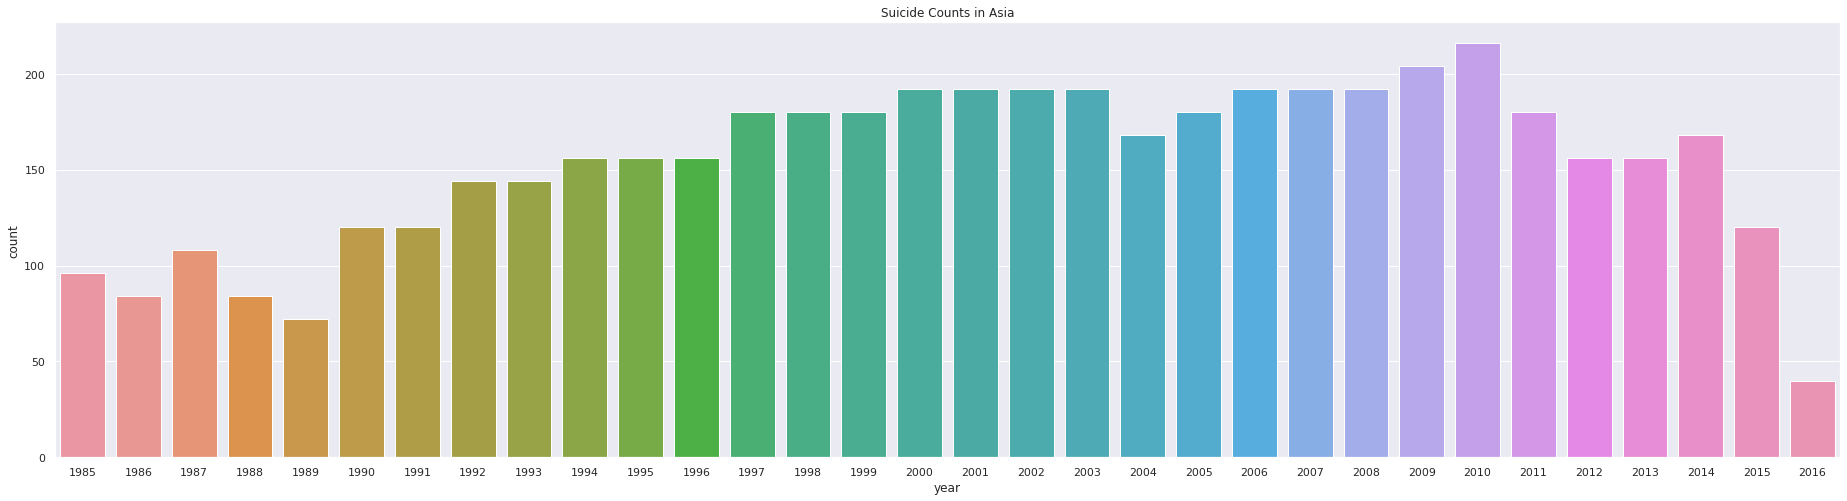

In [28]:
import seaborn as sns
sns.set(rc={'figure.figsize':(32,8)})
sns.set(style="darkgrid")
ax = sns.countplot(x="year", data=Asia_master_df).set_title('Suicide Counts in Asia')
#bx=lineplot

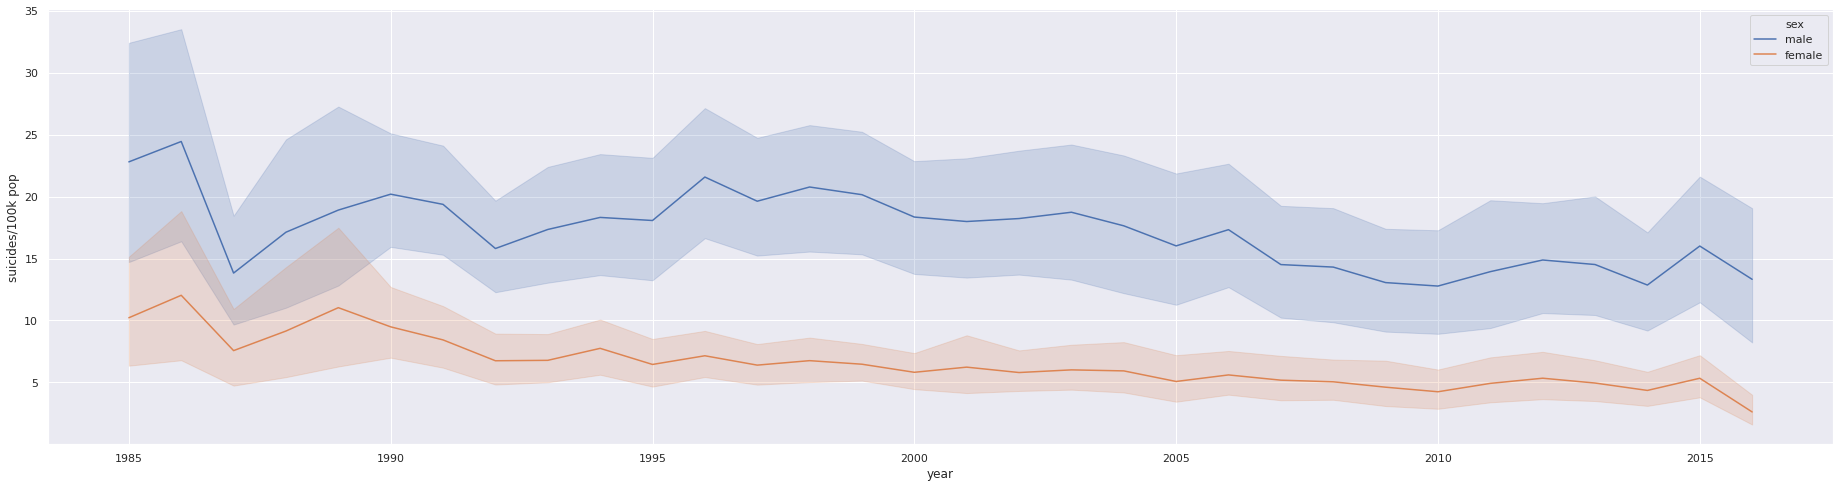

In [29]:
import seaborn as sns
sns.set(rc={'figure.figsize':(32,8)})
ax = sns.lineplot(x="year", y='suicides/100k pop', hue="sex",
                  data=Asia_master_df)

/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:1651: UserWarning: relplot is a figure-level function and does not accept target axes. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


<Figure size 2304x576 with 0 Axes>

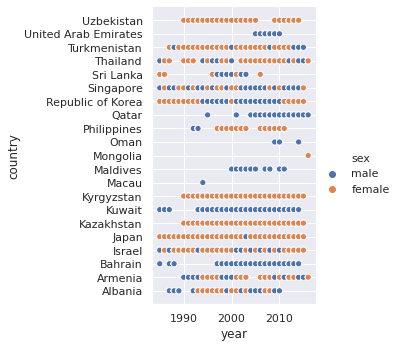

In [30]:
from matplotlib import pyplot as plt
plt.clf()



sns.set(rc={'figure.figsize':(32,8)})

sns.relplot(x="year", y="country",hue='sex',data=Asia_master_df,ax=ax);

Text(0.5, 1.0, 'Distribution of Suicide Occurrences')

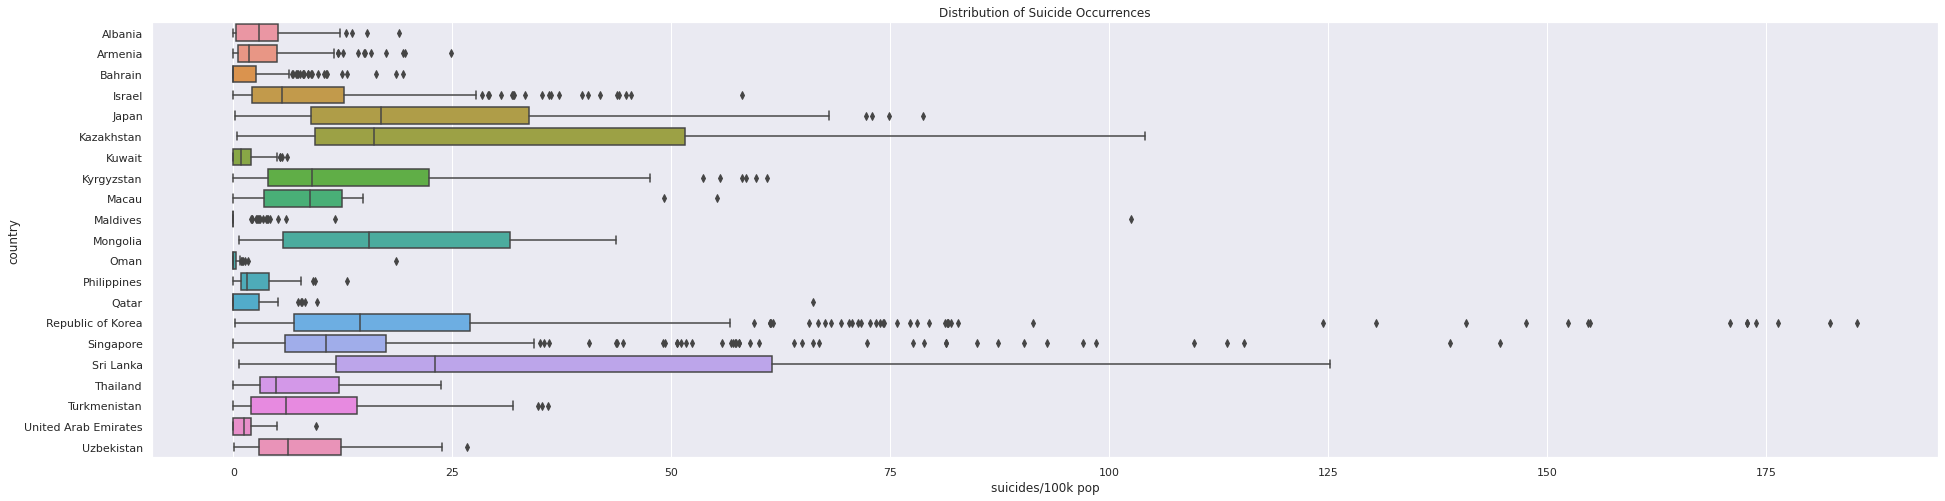

In [31]:
sns.boxplot(x=Asia_master_df['suicides/100k pop'],y=Asia_master_df['country']).set_title('Distribution of Suicide Occurrences')

####Europe

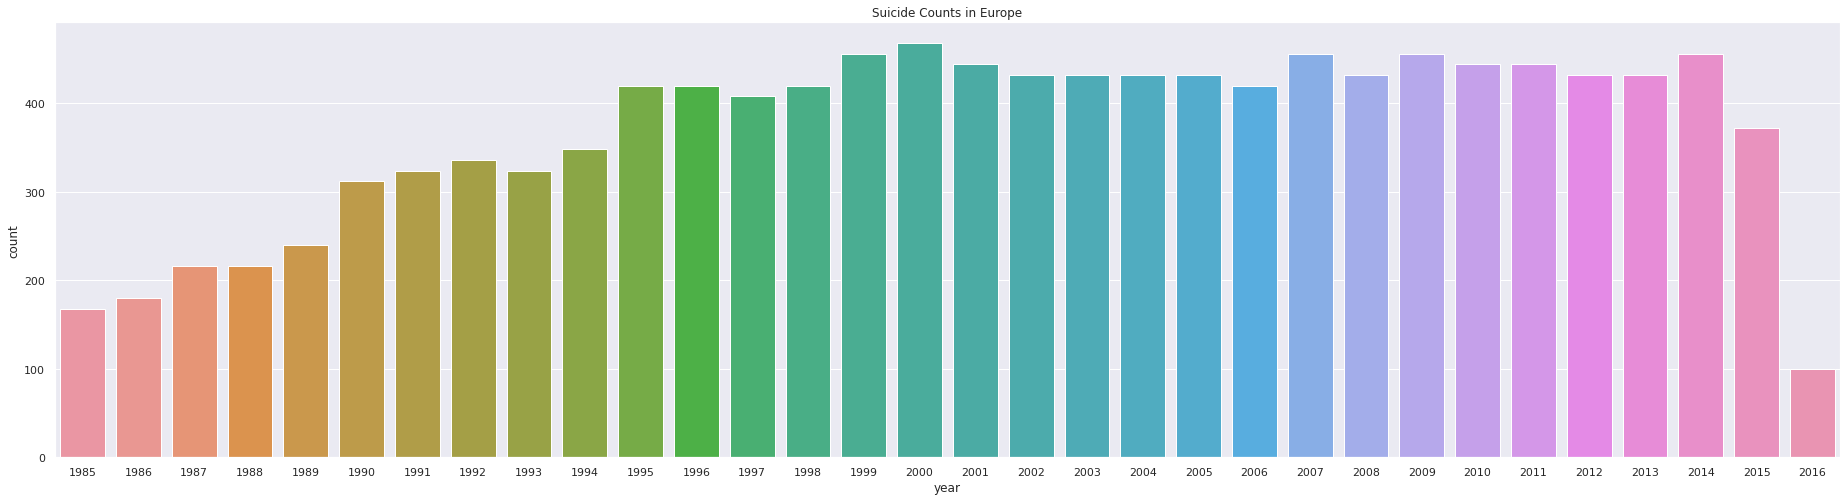

In [32]:
ax = sns.countplot(x="year", data=Europe_master_df).set_title('Suicide Counts in Europe')

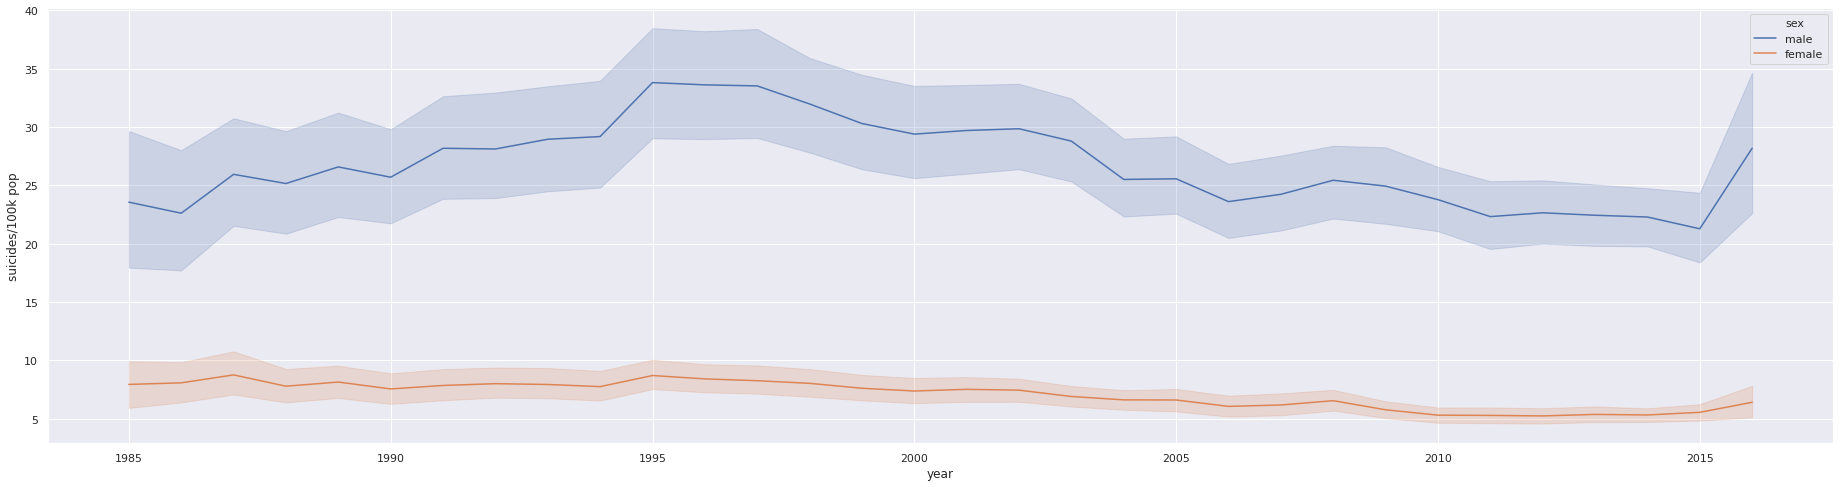

In [33]:
ax = sns.lineplot(x="year", y='suicides/100k pop', hue="sex",
                  data=Europe_master_df)

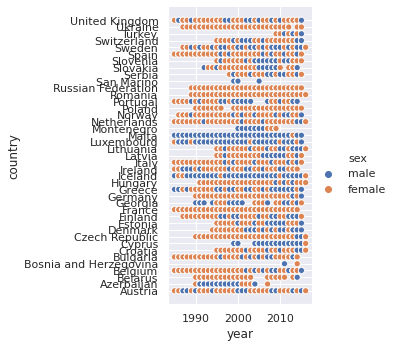

In [34]:
sns.relplot(x="year", y="country",hue='sex',data=Europe_master_df);

Text(0.5, 1.0, 'Distribution of Suicide Occurrences')

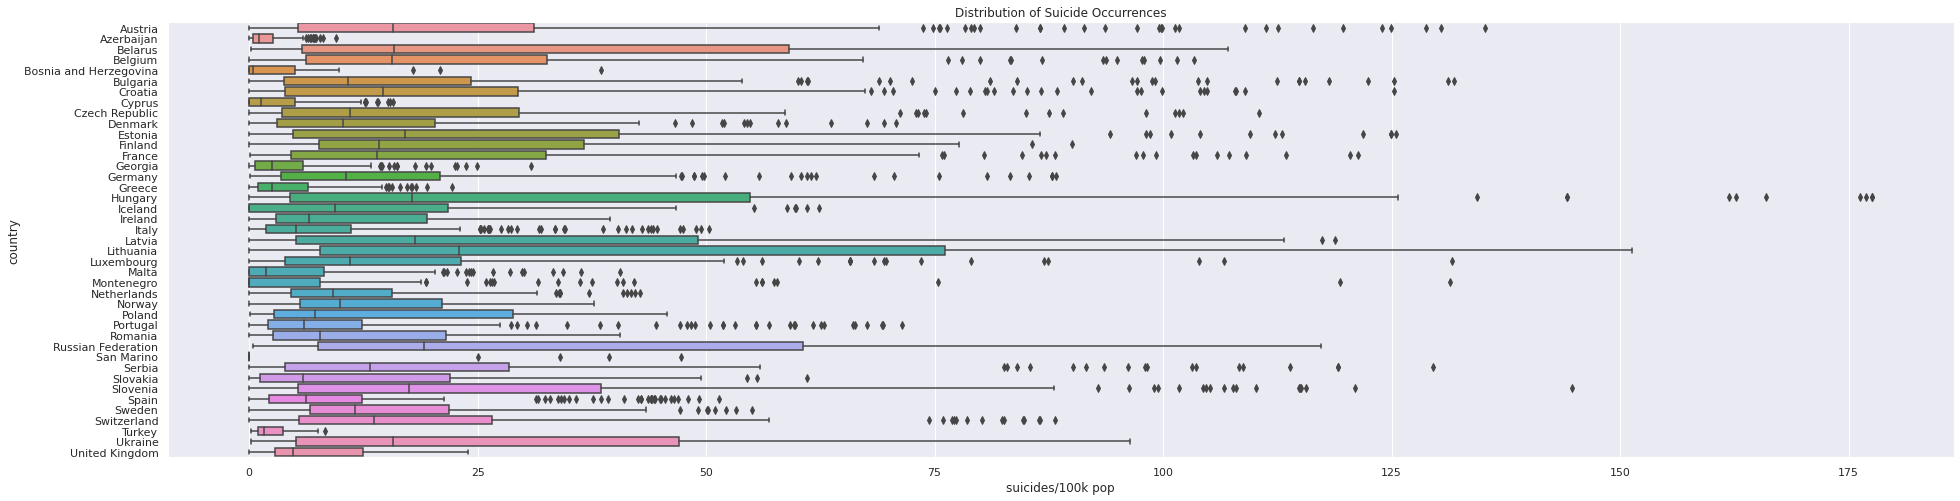

In [35]:
sns.boxplot(x=Europe_master_df['suicides/100k pop'],y=Europe_master_df['country']).set_title('Distribution of Suicide Occurrences')

####Africa

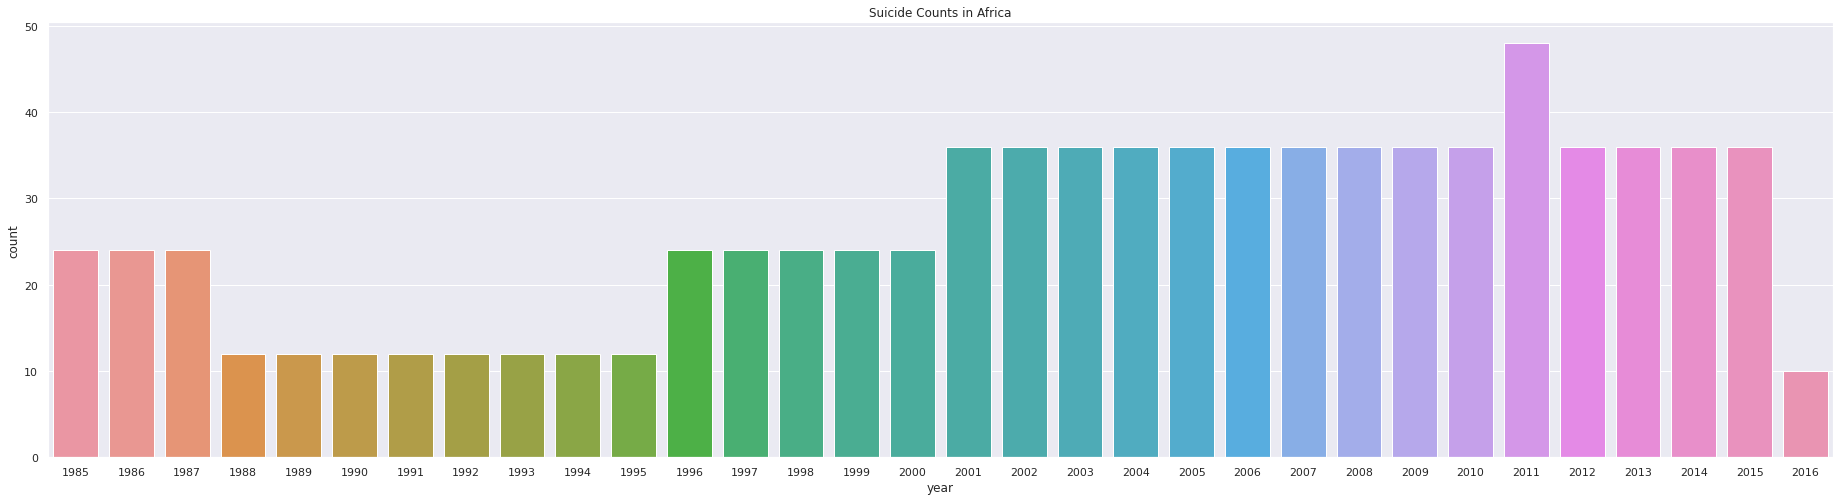

In [36]:
ax = sns.countplot(x="year", data=Africa_master_df).set_title('Suicide Counts in Africa')

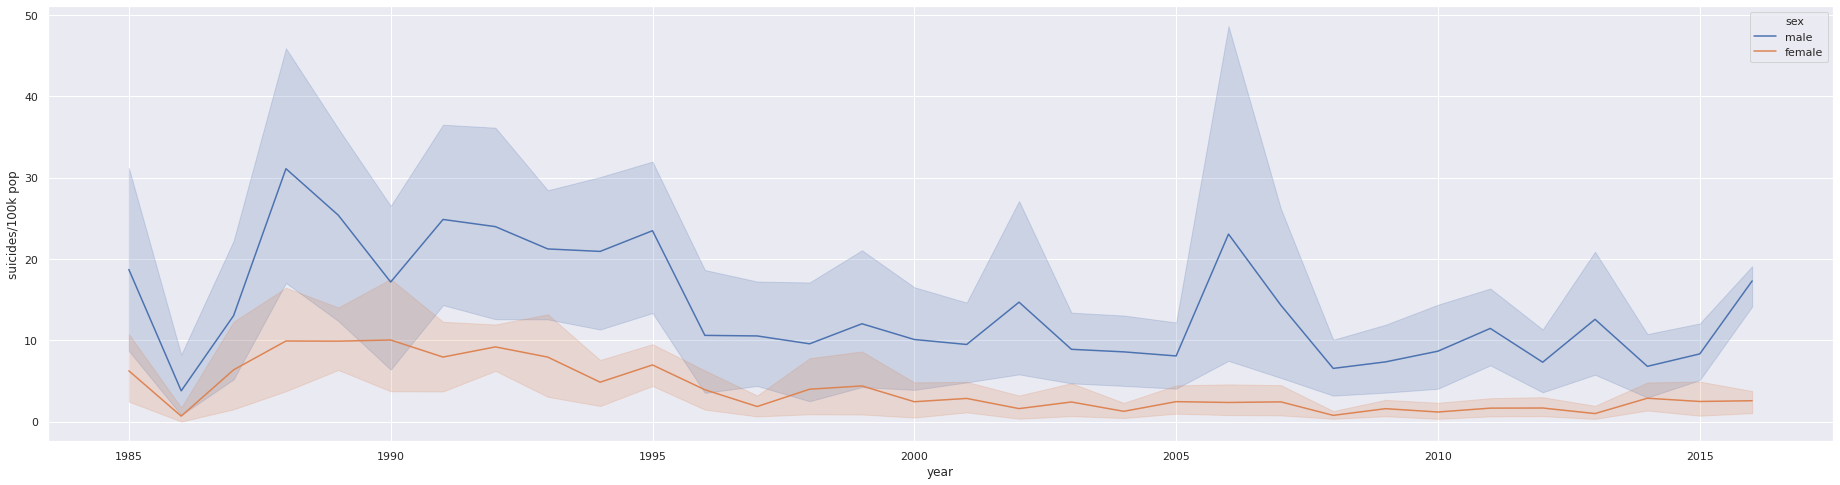

In [37]:
ax = sns.lineplot(x="year", y='suicides/100k pop', hue="sex",
                  data=Africa_master_df)

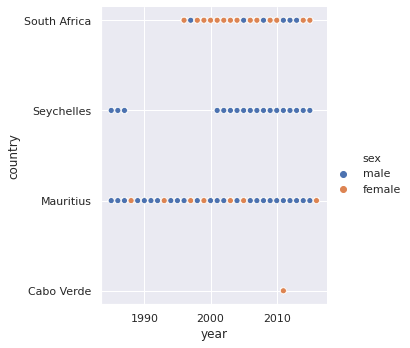

In [38]:
sns.relplot(x="year", y="country",hue='sex',data=Africa_master_df);

Text(0.5, 1.0, 'Distribution of Suicide Occurrences')

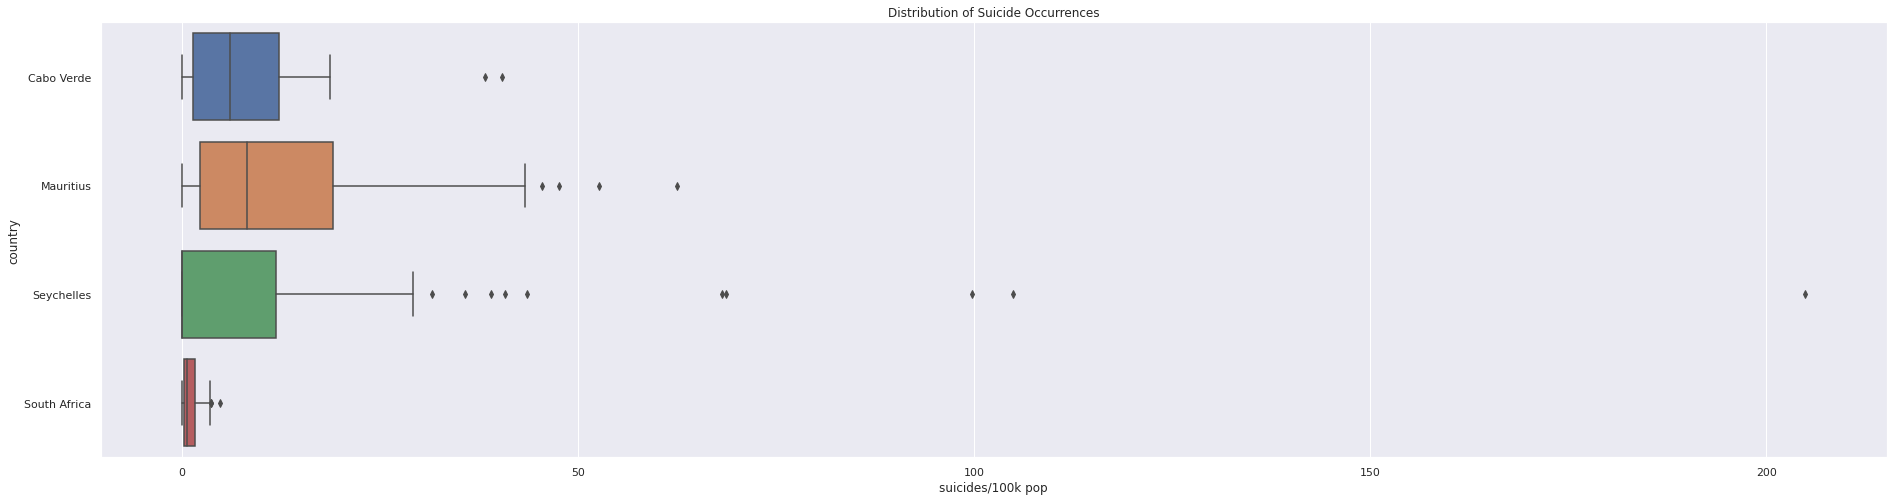

In [39]:
sns.boxplot(x=Africa_master_df['suicides/100k pop'],y=Africa_master_df['country']).set_title('Distribution of Suicide Occurrences')

####North America

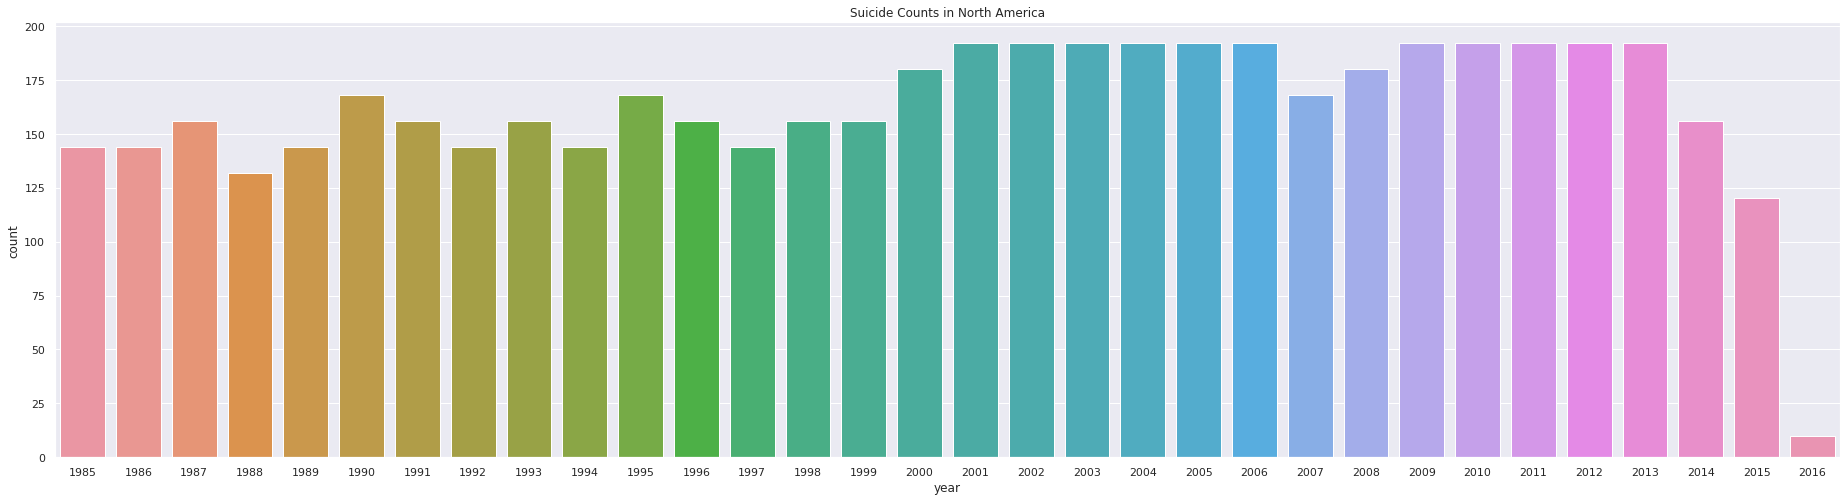

In [40]:
ax = sns.countplot(x="year", data=North_America_master_df).set_title('Suicide Counts in North America')

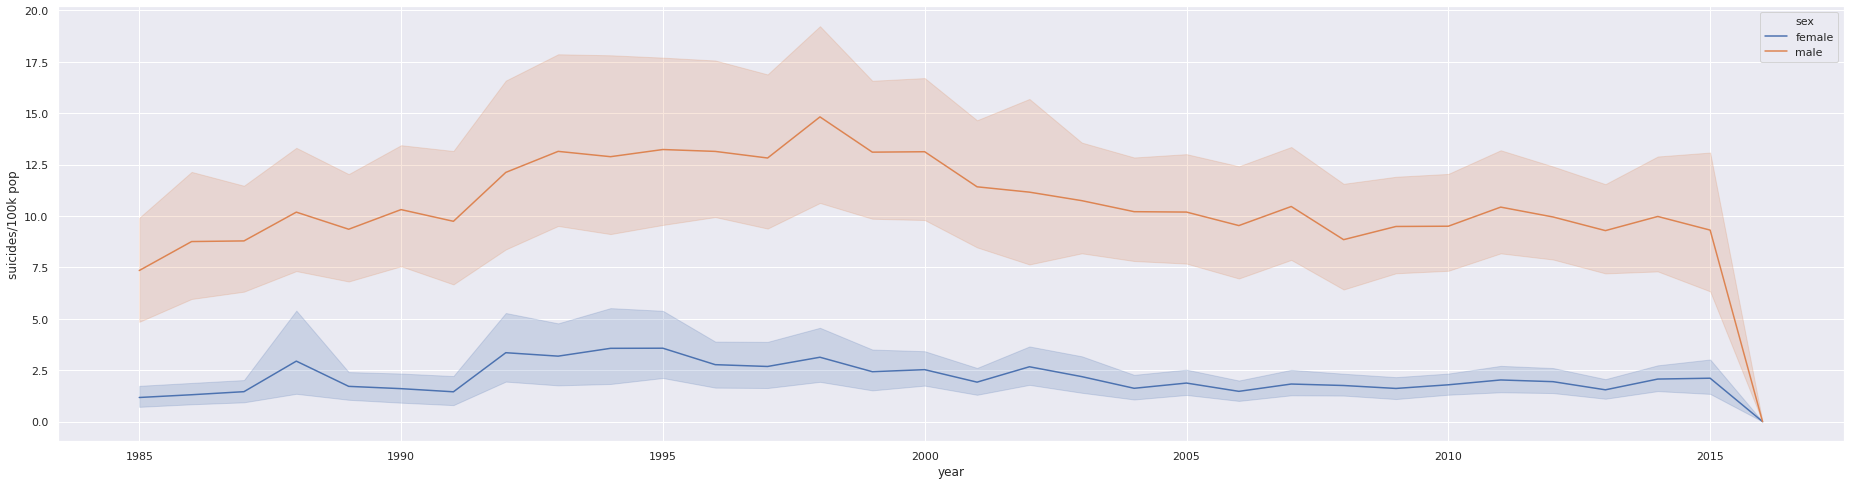

In [41]:
ax = sns.lineplot(x="year", y='suicides/100k pop', hue="sex",
                  data=North_America_master_df)

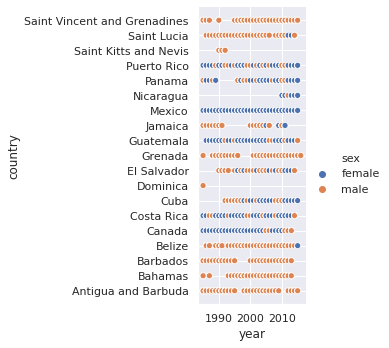

In [42]:
sns.relplot(x="year", y="country",hue='sex',data=North_America_master_df);

Text(0.5, 1.0, 'Distribution of Suicide Occurrences')

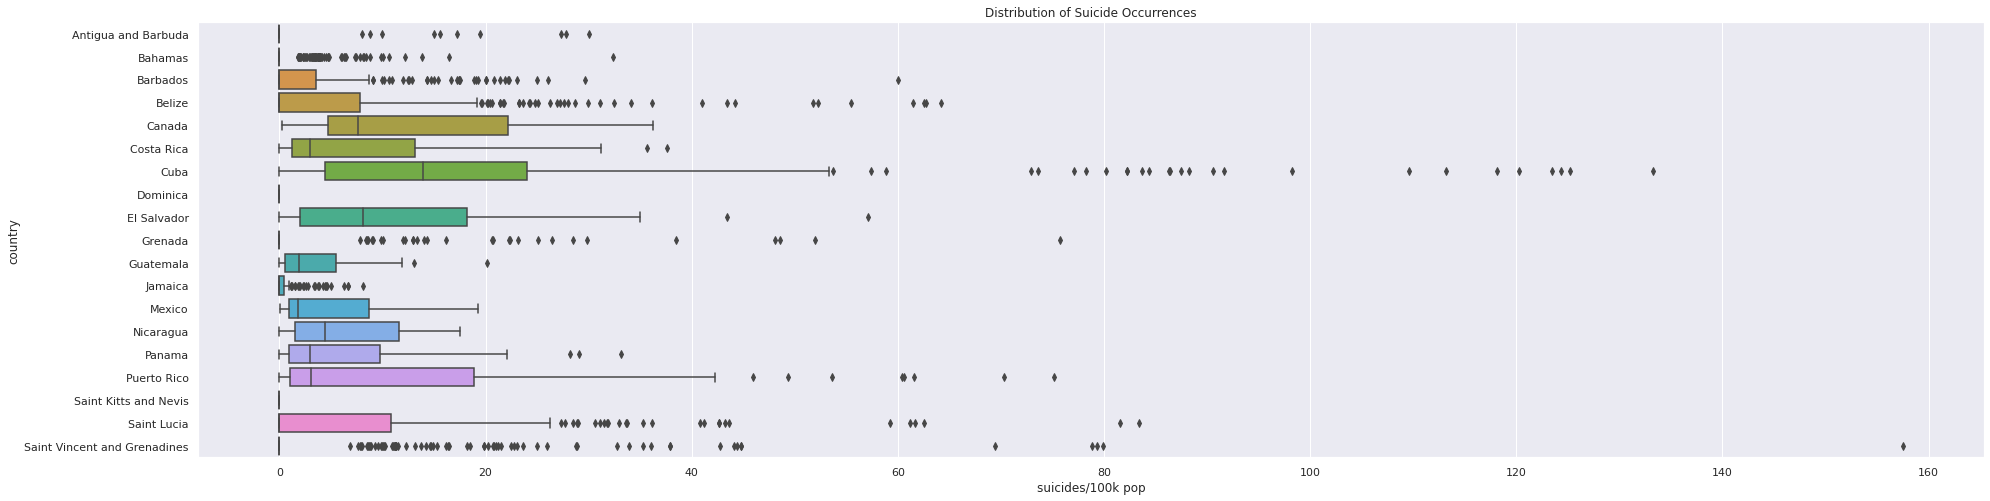

In [43]:
sns.boxplot(x=North_America_master_df['suicides/100k pop'],y=North_America_master_df['country']).set_title('Distribution of Suicide Occurrences')

####South America

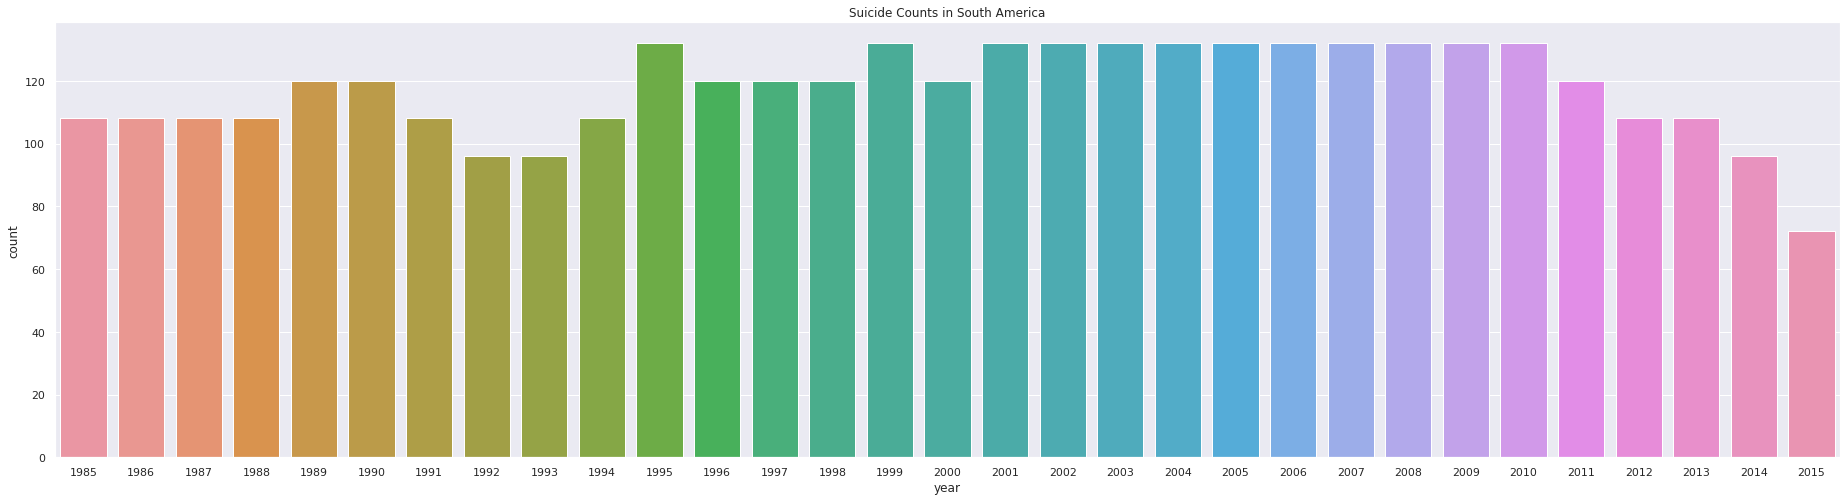

In [44]:
ax = sns.countplot(x="year", data=South_America_master_df).set_title('Suicide Counts in South America')

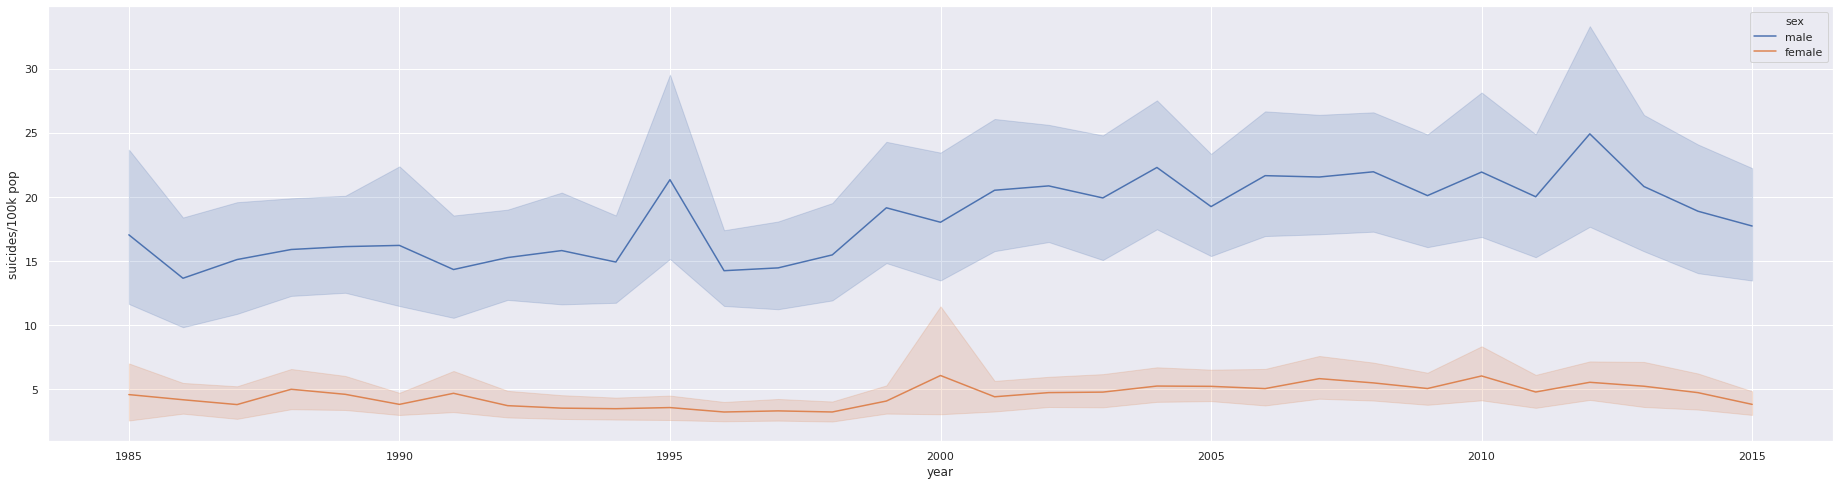

In [45]:
ax = sns.lineplot(x="year", y='suicides/100k pop', hue="sex",
                  data=South_America_master_df)

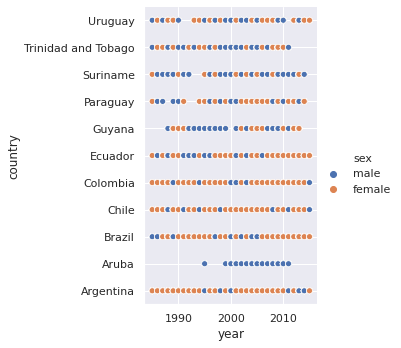

In [46]:
sns.relplot(x="year", y="country",hue='sex',data=South_America_master_df);

Text(0.5, 1.0, 'Distribution of Suicide Occurrences')

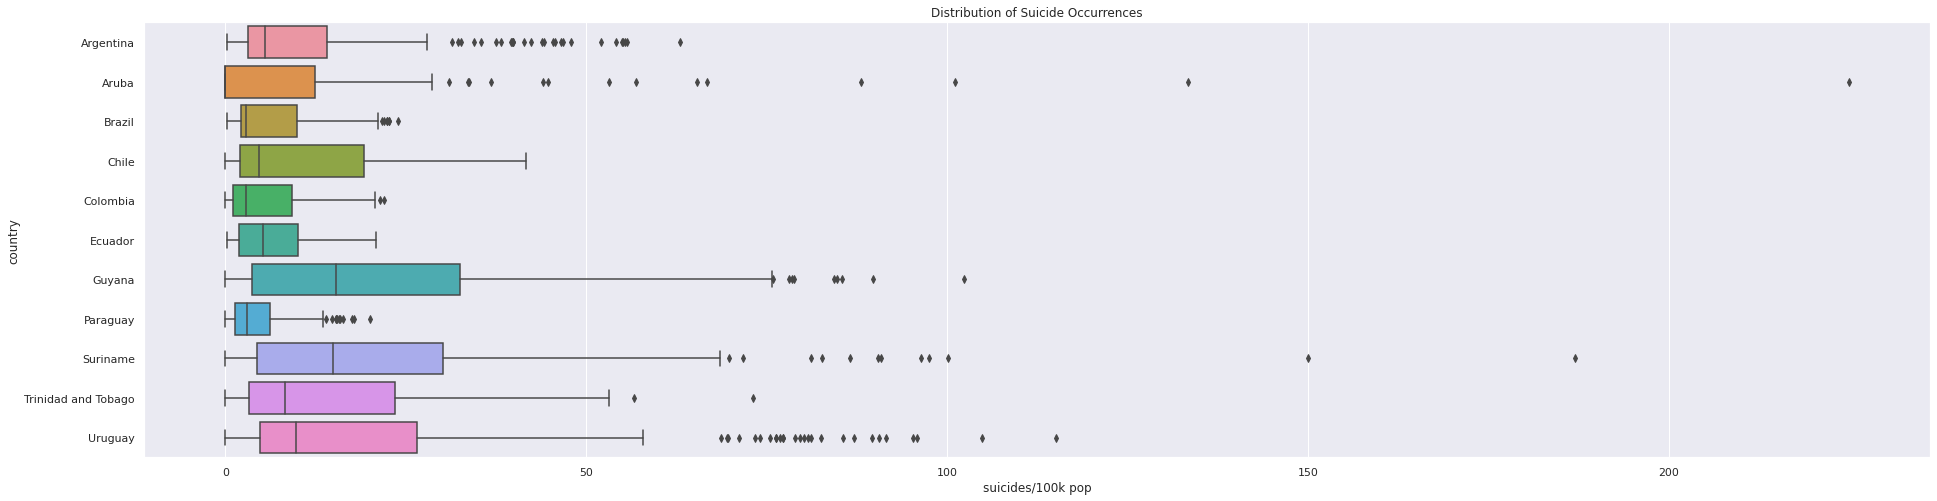

In [47]:
sns.boxplot(x=South_America_master_df['suicides/100k pop'],y=South_America_master_df['country']).set_title('Distribution of Suicide Occurrences')

####Oceania

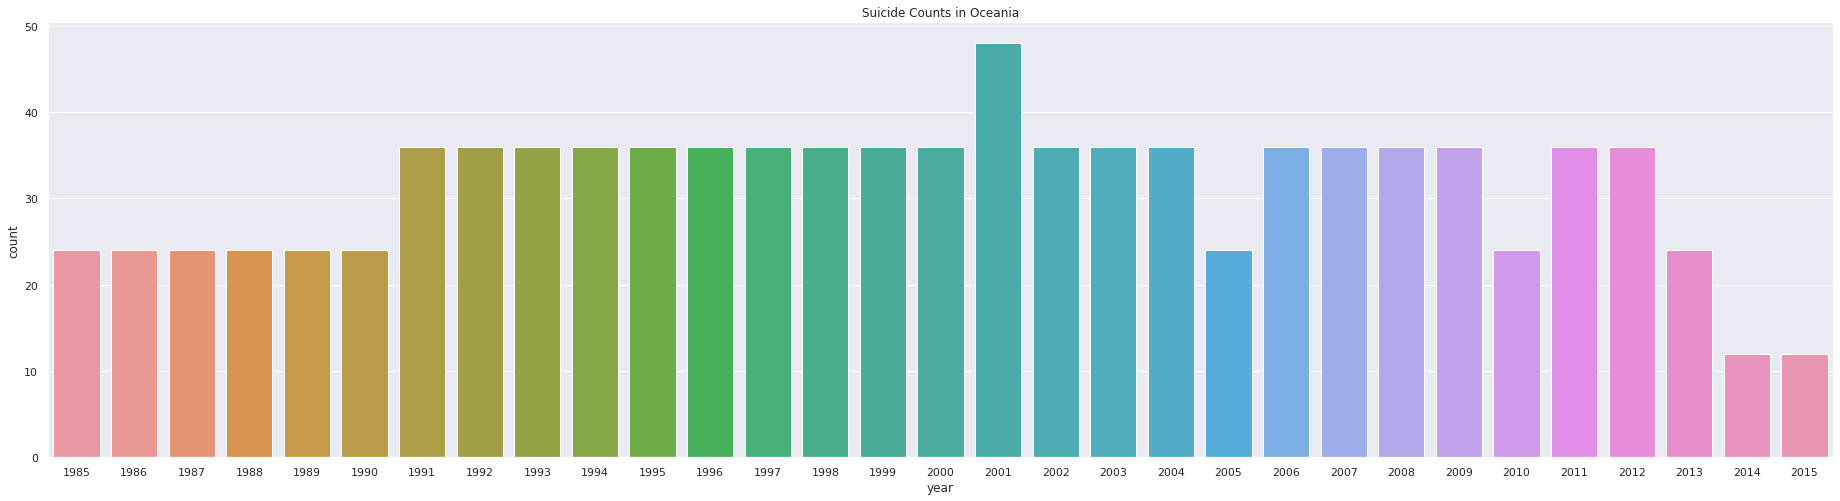

In [48]:
ax = sns.countplot(x="year", data=Oceania_master_df).set_title('Suicide Counts in Oceania')

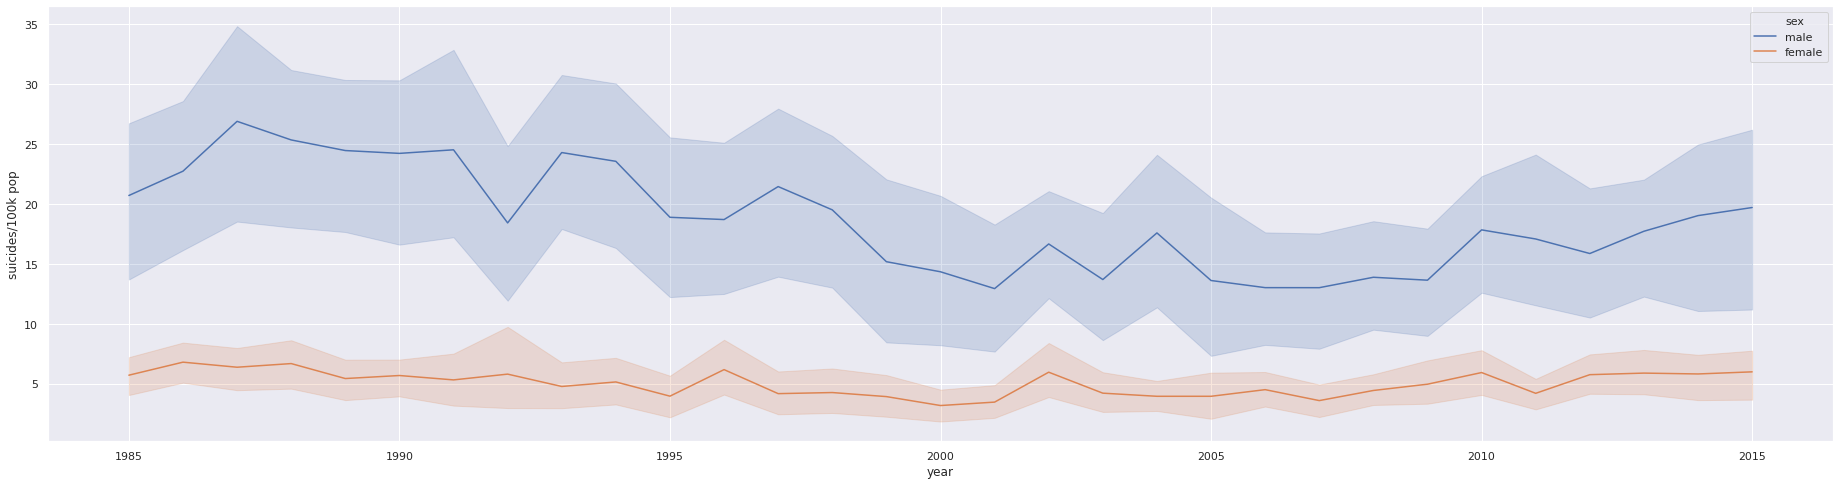

In [49]:
ax = sns.lineplot(x="year", y='suicides/100k pop', hue="sex",
                  data=Oceania_master_df)

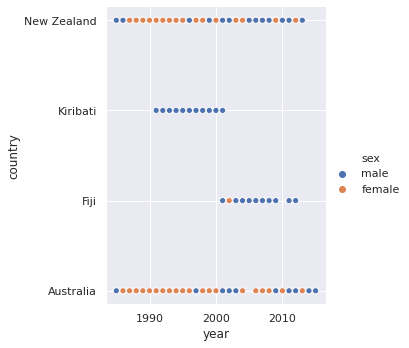

In [50]:
sns.relplot(x="year", y="country",hue='sex',data=Oceania_master_df);

Text(0.5, 1.0, 'Distribution of Suicide Occurrences')

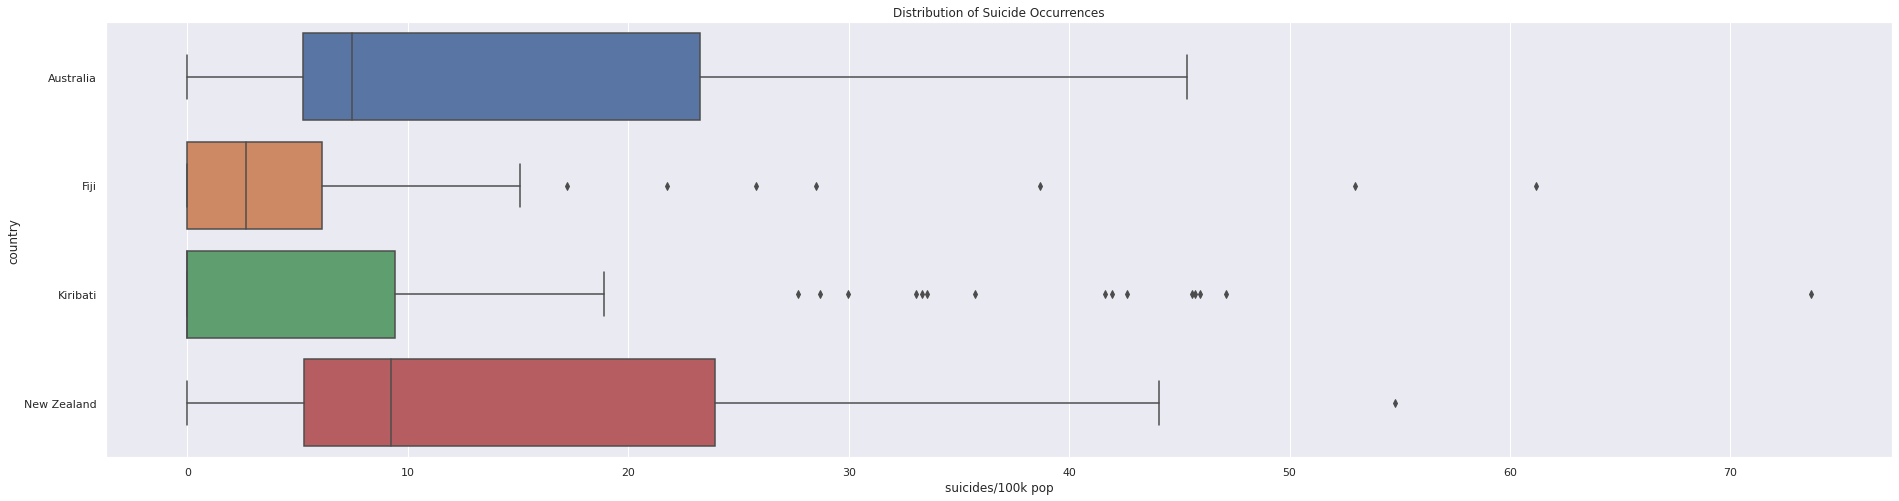

In [51]:
sns.boxplot(x=Oceania_master_df['suicides/100k pop'],y=Oceania_master_df['country']).set_title('Distribution of Suicide Occurrences')

### Parallel Comparison

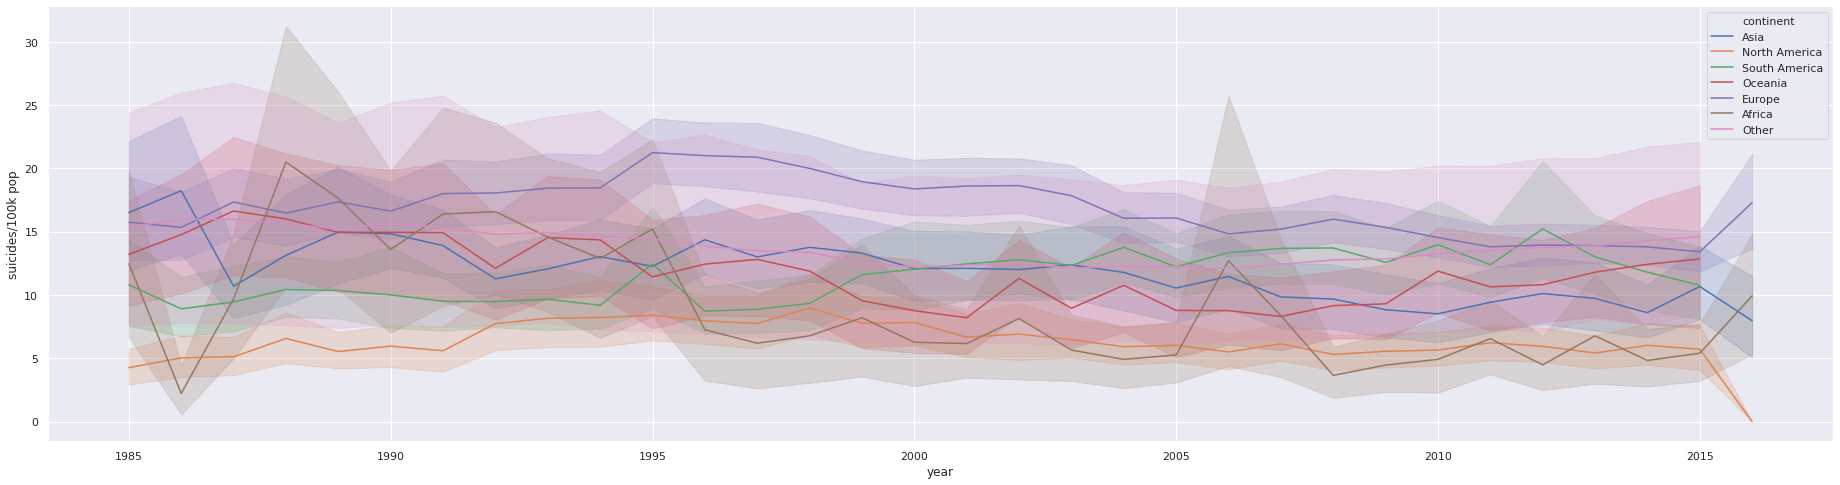

In [52]:
ax = sns.lineplot(x="year", y='suicides/100k pop', hue="continent",
                  data=master_df)

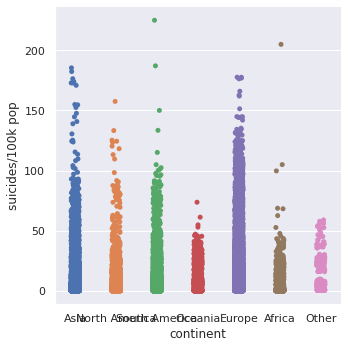

In [53]:
sns.set(rc={'figure.figsize':(32,8)})
sns.catplot(x="continent", y='suicides/100k pop', jitter=True, data=master_df);

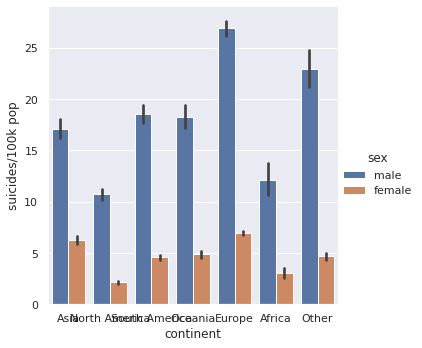

In [54]:
sns.catplot(x="continent", y='suicides/100k pop', hue="sex", kind="bar", data=master_df);

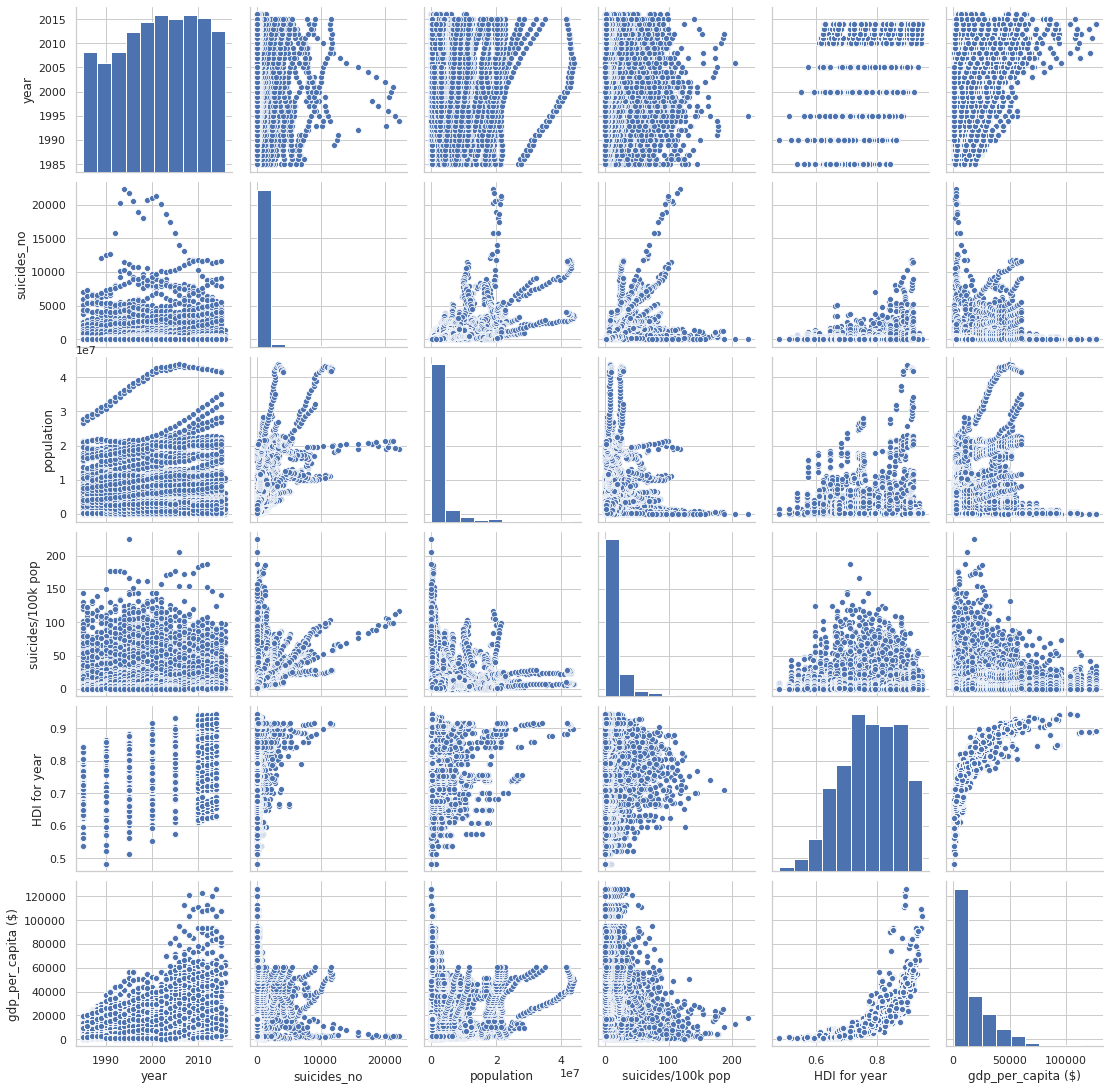

In [55]:
sns.set(rc={'figure.figsize':(32,8)})
sns.set(style="whitegrid", color_codes=False)
g = sns.pairplot(master_df)

# Section 3. Modeling

##3.1 Splitting columns into label and features

Here we are using the Asia_dummies as the dataset that we perform our machine learning studies on. Since data for all continents have been processed in the same way, the ml process could be easily repeated by inserting the datasets into the scripts.

In [0]:
Asia_dummies=Asia_dummies.drop(columns=['HDI for year'])

In [57]:
Asia_master_df.columns

Index(['country', 'year', 'sex', 'age', 'suicides/100k pop', 'HDI for year',
       'gdp_per_capita ($)', 'generation', 'continent'],
      dtype='object')

Here we're going to divide characteristics from the dataset into label and features, I'm selecting the suicide per 100k population as the label and the rest(as show here in the previous cell)as features for model building.

In [0]:
label = Asia_dummies['gdp_per_capita ($)']
features = Asia_dummies.loc[:, Asia_dummies.columns != 'gdp_per_capita ($)']

In [0]:
from sklearn.model_selection import train_test_split
x= features
y= label
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2)


##3.2 Simple Linear regression using sklearn


In this step I trained a linear regression model using sklearn. Using the training data to train, and then make predictions of test.

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
regr = LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
mse_test = mean_squared_error(y_pred,y_test)

##3.3 PCA


Use PCA to reduce number of dimensions of the dataset,and from this dataset we decided to keep 2 components of the features.

In [61]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(\
  x, y, test_size=0.20, random_state=42)

# Fit the PCA on the training data
pca = PCA(n_components=37)
pca.fit(x_train)
# and transform it
x_train_2 = pca.transform(x_train)

# Then train a simple linear regression classifier
# (tries to find the best weighted linear combination to
# match the output)
regr = linear_model.LinearRegression()
regr.fit(x_train_2, y_train)

x_train_2
print(pca.explained_variance_ratio_)
x_test_2 = pca.transform(x_test)

regr.predict(x_test_2)

regr.score(x_test_2, y_test)

[8.29845425e-01 1.63004508e-01 1.13321451e-03 8.12843280e-04
 7.19447280e-04 5.96223836e-04 4.48347253e-04 4.10653233e-04
 3.24844869e-04 2.41604259e-04 1.86358543e-04 1.82611934e-04
 1.81850371e-04 1.70353721e-04 1.65485736e-04 1.60242747e-04
 1.55847771e-04 1.52092428e-04 1.48642828e-04 1.36689101e-04
 1.29579825e-04 1.19782600e-04 1.13747862e-04 9.62372238e-05
 9.00176562e-05 8.42286139e-05 6.32880662e-05 5.40971520e-05
 3.33598271e-05 1.83911641e-05 7.73755082e-06 7.16926015e-06
 5.07694316e-06 8.12861861e-33 8.12861861e-33 8.12861861e-33
 8.12861861e-33]


0.8633698876592729

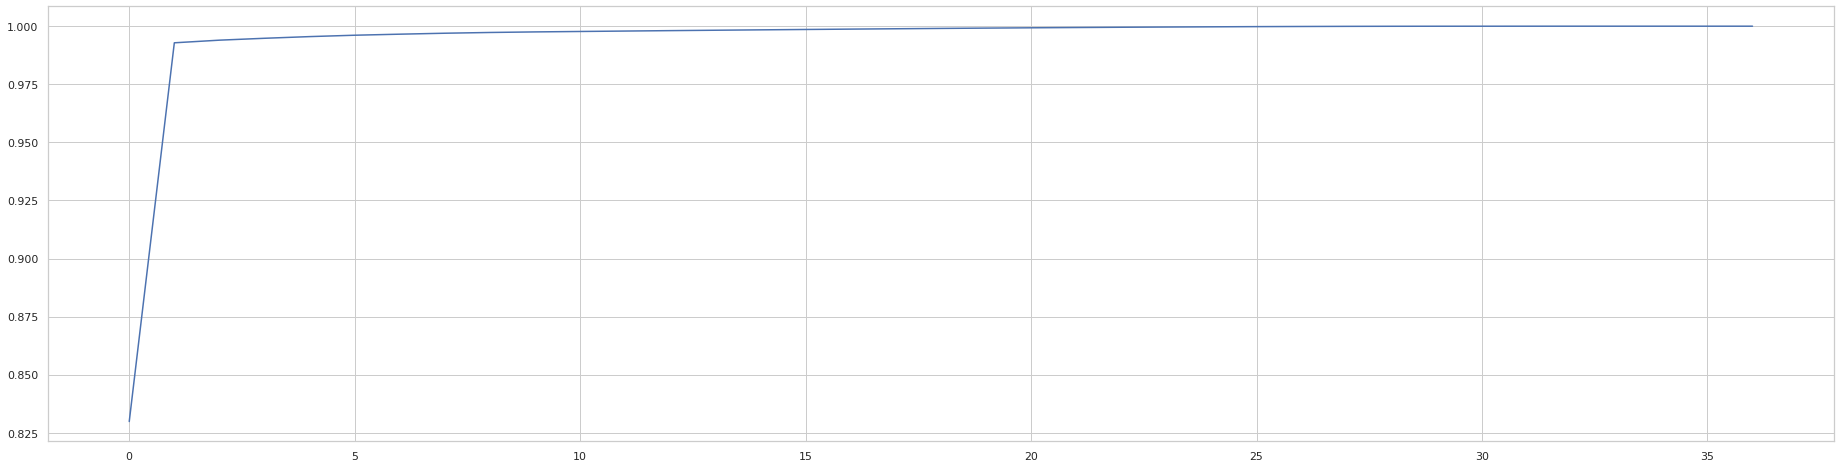

In [62]:
pc_vs_variance = np.cumsum(pca.explained_variance_ratio_)

pc_vs_variance
plt.plot(pc_vs_variance)

**From the graph up here, we decided to keep 2 components**

In [63]:
regr_full_data = linear_model.LinearRegression()
regr_full_data.fit(x_train, y_train)

regr_full_data.predict(x_test)
regr_full_data.score(x_test, y_test)

0.8633698876592721

In [0]:
#The 1st component counts for over 95% of the variance
from sklearn.preprocessing import StandardScaler
#X = StandardScaler( ).fit_transform(x_train)

pca = PCA(n_components = 2)

x_train_1 = pca.fit_transform(x_train)

##3.4 Random Forest

In this part, we trained a random forest model on the transformed train dataset. We also tune hyperparameters available, as well as number of estimators using grid search, and in the end, we selected the best hyperparameters out of these. 

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor(n_estimators = 10, random_state = 42)
rf.fit(x_train, y_train)

print(f'Model Accuracy: {rf.score(x_train, y_train)}')

Model Accuracy: 0.9999891182097993


In [0]:
y_pred = rf.predict(x_test)
mse_test = mean_squared_error(y_pred,y_test)

# Section 4. Description of Challenges/ Obstacles Faced

**There are multiple challenges I have faced throughout this project.**

1. The dataset not big enough, although we are seeing some tendencies here, we are not able to do predictions accurately enough.

2. I was trying to find causalities but also, the information that we could extract from the dataset is limited, such doesn't make the outcome dependable enough. Looking for news happened in certain areas could help us find macroscopic relations to local suicides, but the data processing of news would be a large amount of work and couldn't be performed in such a short individual project.

3. Dividing countries by continents is reasonable but not a perfect way for studying. Other ways to categorize them might be more reliable: such as by climate, by political regimes and by religion.

4. Why can't I change figure sizes......I 've really been struggling with making them bigger.


# Section 5. Potential Next Steps/ Future Direction

1. Do data analysis on local conditions like regional chronicle, regime, news, climates, etc,. and project the result back to suicidal dataset.
For example:https://www.kaggle.com/therohk/million-headlines
A link for a million news headlines, and based on a sentimental analysis, we could draw connection between suicidal rates and news. Some assumptions include: Revolutions in East Europe in 1989 may have caused a boom in 1990s.
2. Improve the results by applying other ml models to it.
